Topic:
This notebook analyzes fake Yammer data to figure out why user engagement grew and then dropped during and after the week of August 1.  User engagement is defined as "the number of users who logged at least one engagement event during the week starting on that date".
Before digging into the data, I hypothesize that there could be several different reasons for user engagement to drop. 
Hypotheses:
1. There could have been reminder or policy update emails from Yammer prompting users to log in at various times during the summer, with an important system email coming around Aug 2.
    -Test by comparing Yammer email events before and after Aug 1.
2. A Yammer feature may have changed around Aug 1 which drove users off the platform.
    -Check whether user behavior across devices changes before and after Aug 1.
3. The month of August might be vacation season.
    -Check by comparing logins before and after Aug 1, looking for zero or few logins afterward.
4. Yammer might have been recruiting companies over the summer, some of which did not continue to engage with the site.
    -Check trends of new and returning user_ids over time.
5. There could have been some external event such as a deadline, the end of a quarter, or business cycle around August 1 such that coworkers would need to interact more up until the deadline, and less afterward.
    -Test by comparing the frequency of message events on the site before and after Aug 1.
Findings:
Recommendations:

In [41]:
#Import data
import pandas as pd
import numpy as np
import csv
import ast
import matplotlib.pyplot as plt
#Define file path and then open csvs as extensions on the file path
email_data=pd.read_csv('/Users/mac/Documents/Sample data science projects/Yammer challenge/yammer_emails.csv')
events_data=pd.read_csv('/Users/mac/Documents/Sample data science projects/Yammer challenge/yammer_events.csv')
users_data=pd.read_csv('/Users/mac/Documents/Sample data science projects/Yammer challenge/yammer_users.csv')
print(email_data.head())
print(email_data.tail())
print(email_data.dtypes)

   user_id          occurred_at              action  user_type
0      0.0  2014-05-06 09:30:00  sent_weekly_digest        1.0
1      0.0  2014-05-13 09:30:00  sent_weekly_digest        1.0
2      0.0  2014-05-20 09:30:00  sent_weekly_digest        1.0
3      0.0  2014-05-27 09:30:00  sent_weekly_digest        1.0
4      0.0  2014-06-03 09:30:00  sent_weekly_digest        1.0
       user_id          occurred_at                   action  user_type
90384  18814.0  2014-08-31 12:12:26               email_open        3.0
90385  18814.0  2014-08-31 12:12:57       email_clickthrough        3.0
90386  18815.0  2014-08-31 13:39:56  sent_reengagement_email        2.0
90387  18815.0  2014-08-31 13:40:14               email_open        2.0
90388  18815.0  2014-08-31 13:40:47       email_clickthrough        2.0
user_id        float64
occurred_at     object
action          object
user_type      float64
dtype: object


In [42]:
#Convert column data types
from datetime import datetime
email_data['occurred_at']=email_data['occurred_at'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
email_data['action']=email_data['action'].astype("category")
email_data['user_type']=email_data['user_type'].astype("category")
email_data['user_id']=email_data['user_id'].astype("category")

print(len(set(email_data['action'])))
print(len(set(email_data['user_id'])))
print(len(set(email_data['occurred_at'])))
print(len(set(email_data['user_type'])))
print(email_data.head())

4
6179
14772
3
  user_id         occurred_at              action user_type
0     0.0 2014-05-06 09:30:00  sent_weekly_digest       1.0
1     0.0 2014-05-13 09:30:00  sent_weekly_digest       1.0
2     0.0 2014-05-20 09:30:00  sent_weekly_digest       1.0
3     0.0 2014-05-27 09:30:00  sent_weekly_digest       1.0
4     0.0 2014-06-03 09:30:00  sent_weekly_digest       1.0


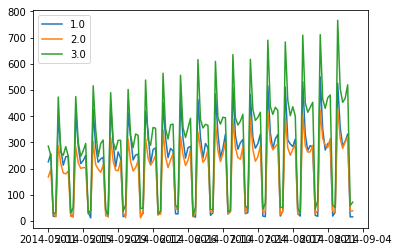

In [43]:
import matplotlib.pyplot as plt
email_data = email_data.set_index('occurred_at')
grouped = email_data.groupby('user_type')

for key, group in grouped:
    data = group.groupby(lambda x: x.date).count()
    data['user_type'].plot(label=key)

#plt.xlim(2014, 2014)
#plt.ylim(0,5000)
plt.legend()
plt.show()

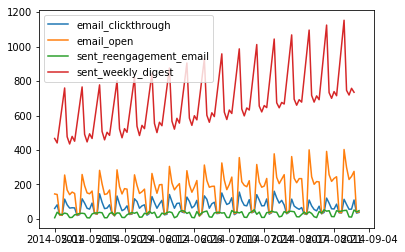

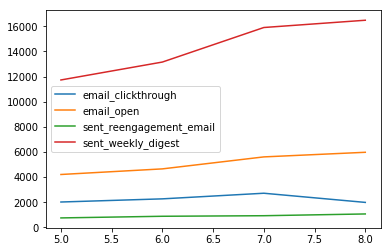

In [45]:
grouped = email_data.groupby('action')

for key, group in grouped:
    data = group.groupby(lambda x: x.date).count()
    data['action'].plot(label=key)

#plt.ylim(0,5000)
plt.legend()
plt.show()

for key, group in grouped:
    data2 = group.groupby(lambda x: x.month).count()
    data2['action'].plot(label=key)

#plt.ylim(0,5000)
plt.legend()
plt.show()

We learned that there are three types of users, four types of email actions, 6,179 unique users, 14,772 dates, and 90,389 email events.  The trends in email events seem fairly steady over this period, although the click-through rate on email seems to reflect the trend in user engagement.  We don't know why users stopped clicking through as many of the emails, however.

In [21]:
#Next, we were interested in if a change to the Yammer platform affected user engagement.
#This might show up in activity across devices since the platform may not update at the same time.
#It might also show up across locations.
print(events_data.head())
print(events_data.tail())
events_data['user_id']=events_data['user_id'].astype("category")
events_data['occurred_at']=events_data['occurred_at'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
events_data['event_type']=events_data['event_type'].astype("category")
events_data['event_name']=events_data['event_name'].astype("category")
events_data['location']=events_data['location'].astype("category")
events_data['device']=events_data['device'].astype("category")
events_data['user_type']=events_data['user_type'].astype("category")
print(events_data.dtypes)


   user_id          occurred_at  event_type    event_name location  \
0  10522.0  2014-05-02 11:02:39  engagement         login    Japan   
1  10522.0  2014-05-02 11:02:53  engagement     home_page    Japan   
2  10522.0  2014-05-02 11:03:28  engagement  like_message    Japan   
3  10522.0  2014-05-02 11:04:09  engagement    view_inbox    Japan   
4  10522.0  2014-05-02 11:03:16  engagement    search_run    Japan   

                   device  user_type  
0  dell inspiron notebook        3.0  
1  dell inspiron notebook        3.0  
2  dell inspiron notebook        3.0  
3  dell inspiron notebook        3.0  
4  dell inspiron notebook        3.0  
        user_id          occurred_at  event_type    event_name location  \
340827  18815.0  2014-08-31 13:41:46  engagement  like_message  Ireland   
340828  18815.0  2014-08-31 13:42:11  engagement     home_page  Ireland   
340829  18815.0  2014-08-31 13:42:43  engagement  send_message  Ireland   
340830  18815.0  2014-08-31 13:43:07  engagem

In [22]:
events_data = events_data.set_index('occurred_at')
features=events_data.columns[1:]
print(features)

Index(['event_type', 'event_name', 'location', 'device', 'user_type'], dtype='object')


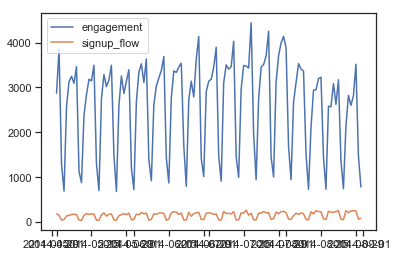

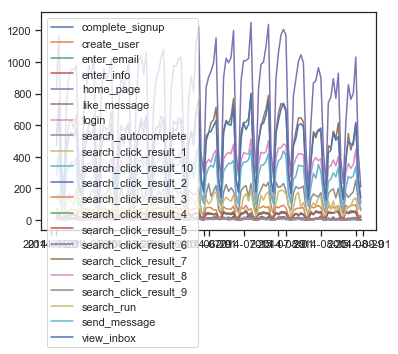

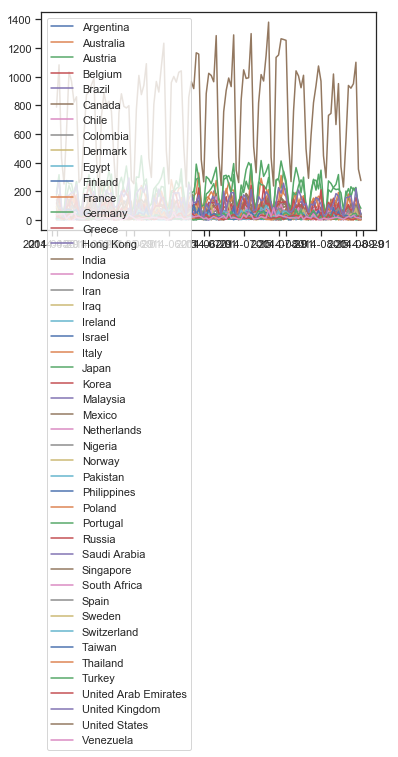

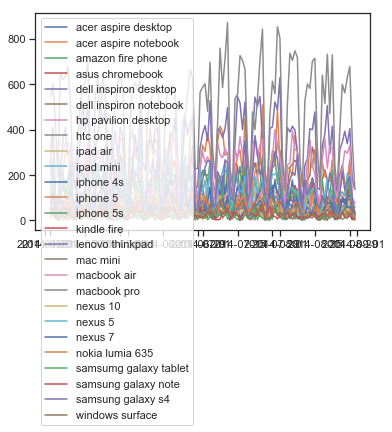

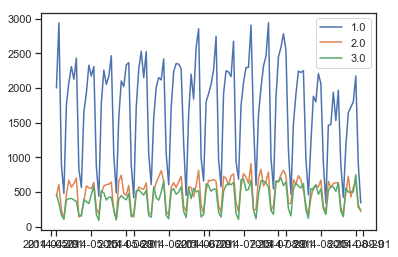

In [71]:
for item in features:
    grouped = events_data.groupby(item)

    for key, group in grouped:
        data = group.groupby(lambda x: x.date).count()
        data[item].plot(label=key)

    #plt.xlim(2014, 2014)
    #plt.ylim(0,max(data[item])+1000)
    plt.legend()
    plt.show()

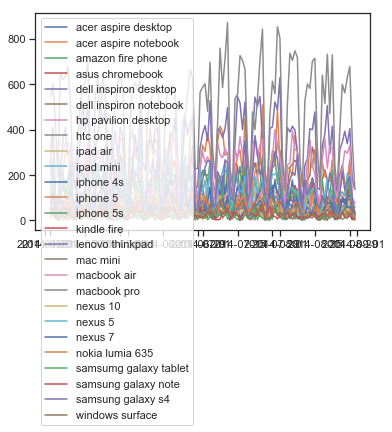

In [72]:
#We want to group by mobile, tablet, and computer device types, but I don't have time to actually do it
#Next time, I should just pick a few for each category that I can identify
events_data['device_type']='mobile'
events_data['device_type']='tablet'
events_data['device_type']='computer'

grouped = events_data.groupby('device')

for key, group in grouped:
    data = group.groupby(lambda x: x.date).count()
    data['device'].plot(label=key)

#plt.xlim(2014, 2014)
#plt.ylim(0,4000)
plt.legend()
plt.show()

In [28]:
#Finally, we were interested in whether users were dropping off 
#due to vacations/business trends within companies or a pattern in Yammer recruiting.
print(users_data.head())
print(users_data.tail())
print(users_data.dtypes)
users_data['user_id']=users_data['user_id'].astype("category")
users_data['created_at']=users_data['created_at'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
users_data['activated_at']=pd.to_datetime(users_data['activated_at'])
users_data['created_at']=pd.to_datetime(users_data['created_at'])


#users_data['company_id']=users_data['company_id'].astype("category")
users_data['language']=users_data['language'].astype("category")
users_data['state']=users_data['state'].astype("category")
print(users_data.dtypes)
print(len(set(users_data['company_id']))) #13,000+ companies!  We might want to focus on just the largest
company_counts=users_data['user_id'].groupby(users_data['company_id']).count()
print(company_counts)
print(company_counts.sum())
print(users_data['company_id'].mode()[0])

   user_id           created_at  company_id language         activated_at  \
0      0.0  2013-01-01 20:59:39      5737.0  english  2013-01-01 21:01:07   
1      1.0  2013-01-01 13:07:46        28.0  english                  NaN   
2      2.0  2013-01-01 10:59:05        51.0  english                  NaN   
3      3.0  2013-01-01 18:40:36      2800.0   german  2013-01-01 18:42:02   
4      4.0  2013-01-01 14:37:51      5110.0   indian  2013-01-01 14:39:05   

     state  
0   active  
1  pending  
2  pending  
3   active  
4   active  
       user_id           created_at  company_id language         activated_at  \
19061  19061.0  2014-08-31 13:21:16      2156.0  chinese  2014-08-31 13:22:50   
19062  19062.0  2014-08-31 19:21:23      7520.0  spanish                  NaN   
19063  19063.0  2014-08-31 07:10:41        72.0  spanish  2014-08-31 07:12:09   
19064  19064.0  2014-08-31 17:45:18         2.0  english                  NaN   
19065  19065.0  2014-08-31 19:29:19      8352.0  itali

created_at      datetime64[ns]
user_id               category
company_id             float64
language              category
activated_at    datetime64[ns]
state                 category
dtype: object
   index          created_at user_id  company_id language        activated_at  \
0      0 2013-01-01 20:59:39     0.0      5737.0  english 2013-01-01 21:01:07   
1      1 2013-01-01 13:07:46     1.0        28.0  english                 NaT   
2      2 2013-01-01 10:59:05     2.0        51.0  english                 NaT   
3      3 2013-01-01 18:40:36     3.0      2800.0   german 2013-01-01 18:42:02   
4      4 2013-01-01 14:37:51     4.0      5110.0   indian 2013-01-01 14:39:05   

     state  
0   active  
1  pending  
2  pending  
3   active  
4   active  


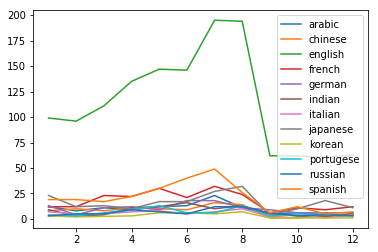

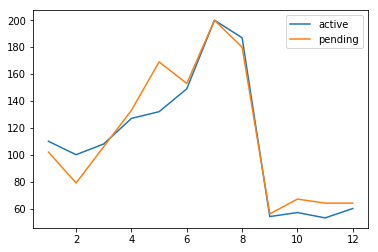

In [38]:
#Check trends in account creations by language, state, and company
print(users_data.dtypes)
users_data.reset_index(inplace=True)
print(users_data.head())
users_data2 = users_data[users_data['company_id']<10].set_index('created_at')
users_data = users_data.set_index('created_at')
features=users_data.columns[1:]
    
features=['language', 'state']
for item in features:
    grouped = users_data2.groupby(item)

    for key, group in grouped:
        data = group.groupby(lambda x: x.month).count()
        data[item].plot(label=key)

    plt.legend()
    plt.show()

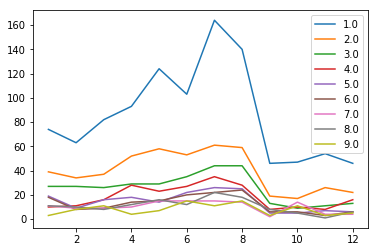

In [39]:
features=['company_id']
for item in features:
    grouped = users_data2.groupby(item)

    for key, group in grouped:
        data = group.groupby(lambda x: x.month).count()
        data[item].plot(label=key)

    plt.legend()
    plt.show()

This plot looks like an acceleration and subsequent dropoff in account creations from companies, especially the largest US companies, may be partially responsible for the uptick/downtick in user engagement around August (Hypothesis: new users drive user engagement).  This effect is in addition to the drop-off in email click-through that started around this time.